In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')


Matplotlib is building the font cache; this may take a moment.


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)

#split data into dev and train
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T #each column is an example instead of each row
Y_dev = data_dev[0] #labels
X_dev = data_dev[1:n] 
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [13]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1) #activation func
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2) #to get output probs between 0 and 1
    return Z1, A1, Z2, A2


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1 #one hot encoding
    one_hot_Y = one_hot_Y.T #transpose for mat mult so each column is an example
    return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    m = Y.size
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [14]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 3 4 ... 4 4 5] [5 9 2 ... 0 8 2]
0.05836585365853659
Iteration:  10
[3 9 8 ... 3 8 8] [5 9 2 ... 0 8 2]
0.10224390243902438
Iteration:  20
[7 9 3 ... 7 8 8] [5 9 2 ... 0 8 2]
0.14790243902439024
Iteration:  30
[7 9 3 ... 7 4 2] [5 9 2 ... 0 8 2]
0.22641463414634147
Iteration:  40
[7 9 3 ... 7 4 2] [5 9 2 ... 0 8 2]
0.27051219512195124
Iteration:  50
[7 4 3 ... 0 4 2] [5 9 2 ... 0 8 2]
0.3194878048780488
Iteration:  60
[7 4 3 ... 0 4 2] [5 9 2 ... 0 8 2]
0.3701951219512195
Iteration:  70
[7 4 3 ... 0 4 2] [5 9 2 ... 0 8 2]
0.42697560975609755
Iteration:  80
[5 9 3 ... 0 8 2] [5 9 2 ... 0 8 2]
0.4796829268292683
Iteration:  90
[5 9 3 ... 0 8 2] [5 9 2 ... 0 8 2]
0.5225609756097561
Iteration:  100
[5 9 2 ... 0 8 2] [5 9 2 ... 0 8 2]
0.5594634146341464
Iteration:  110
[5 9 2 ... 0 8 2] [5 9 2 ... 0 8 2]
0.5916585365853658
Iteration:  120
[5 9 2 ... 0 8 2] [5 9 2 ... 0 8 2]
0.6208780487804878
Iteration:  130
[5 9 2 ... 0 8 2] [5 9 2 ... 0 8 2]
0.6457073170731708
Iteration: 

In [15]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


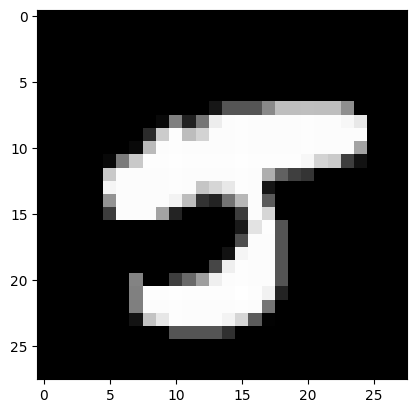

Prediction:  [9]
Label:  9


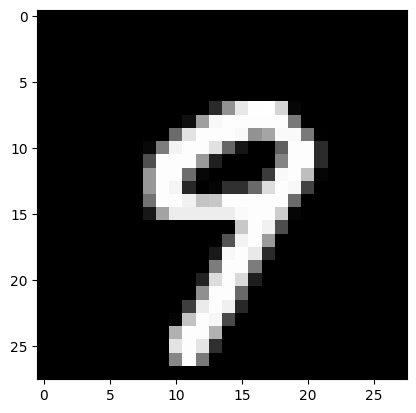

Prediction:  [2]
Label:  2


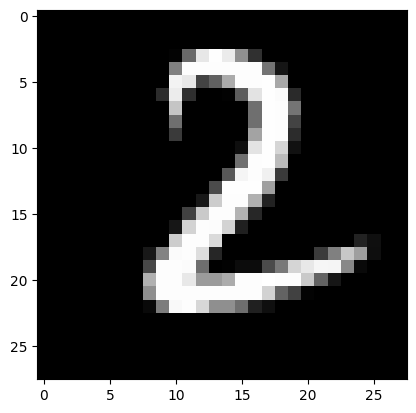

Prediction:  [1]
Label:  1


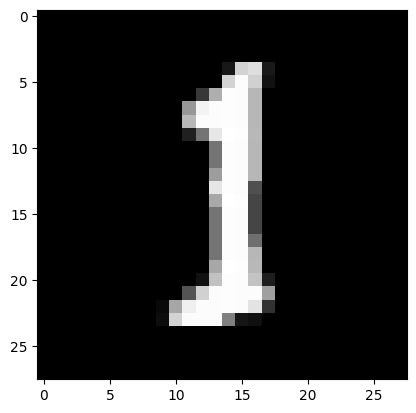

In [16]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [17]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 8 9 2 1 7 0 2 7 9 0 8 3 4 5 0 1 0 1 1 4 3 0 3 2 3 1 3 7 0 7 7 7 0 0 9 2
 6 4 9 1 0 0 1 9 2 7 2 2 9 5 9 9 7 4 6 6 8 4 4 9 1 8 4 8 4 7 9 7 1 9 9 8 3
 4 8 2 4 7 9 7 9 2 7 4 7 2 0 9 5 6 2 2 9 7 1 9 1 2 9 6 6 7 1 8 0 6 1 2 8 8
 0 1 0 2 9 3 1 3 7 5 3 0 6 1 5 2 1 7 2 8 7 7 3 2 7 9 5 3 4 7 0 6 0 7 5 8 7
 7 3 3 5 7 2 9 1 5 5 1 6 3 3 7 1 4 1 3 3 3 3 5 3 1 4 7 0 6 5 1 3 1 9 0 7 8
 4 6 0 3 4 6 2 5 2 3 7 3 6 0 9 8 9 1 8 1 6 7 3 3 3 2 6 8 2 6 3 3 6 3 4 4 5
 9 1 7 0 9 2 2 0 7 5 7 0 3 0 7 7 5 2 3 7 9 0 1 9 7 1 9 3 1 7 8 0 7 5 7 5 5
 7 3 8 9 4 2 0 0 2 6 9 6 6 0 8 8 6 1 9 5 0 2 8 4 8 7 3 6 4 8 2 3 9 0 8 3 8
 7 4 6 2 1 1 3 3 9 3 7 3 3 0 9 3 3 4 1 5 3 5 5 8 6 5 3 3 2 4 2 8 6 8 7 9 9
 0 6 8 8 8 1 5 5 0 7 7 0 2 7 7 2 0 8 0 3 1 3 8 2 8 4 5 6 2 3 5 2 1 7 7 6 2
 3 0 6 1 1 8 6 4 0 6 0 0 7 6 0 6 4 1 7 8 6 4 7 9 9 9 8 8 4 2 6 0 6 8 7 2 2
 5 7 7 7 7 5 1 2 2 7 9 1 0 5 9 6 3 8 2 3 7 3 5 3 4 7 3 3 0 4 7 7 2 9 2 1 2
 6 4 9 7 6 8 3 3 0 3 1 0 7 7 1 1 7 3 3 3 4 2 5 5 0 9 6 1 8 9 8 0 3 2 0 6 7
 3 7 6 6 9 4 2 0 4 1 9 7 

np.float64(0.845)